## from the Friis equation:
$$          G(\omega) = \left( \frac{4\pi R}{\lambda} \right) |S_{12}| $$

## To extract effective height from the S21 measurement, we can use the following formula:

$$|h_{Rx Realized}|^{2} = \frac{c^{2}_{0}}{f^{2} 4n} \frac{50 \Omega }{\pi Z_0} G_{rl}(\omega)$$

where $G_{rl}(\omega)$:

$$  G_{rl}(\omega) = G(\omega) [ 1 - |S_{11}|^{2} ]  $$



In [3]:
from NuRadioReco.utilities import units, fft
from NuRadioReco.detector import antennapattern

import pandas as pd
import numpy as np

import skrf as rf
from skrf.data import ring_slot

import matplotlib.pyplot as plt
from scipy import constants 

antenna pattern /usr/local/lib/python3.9/site-packages/NuRadioReco/detector/AntennaModels/createLPDA_100MHz_InfAir/createLPDA_100MHz_InfAir.pkl does not exist, file will be downloaded
...download finished.
loading antenna file createLPDA_100MHz_InfAir took 13 seconds


Text(0.5, 0, 'Frequency, [GHz]')

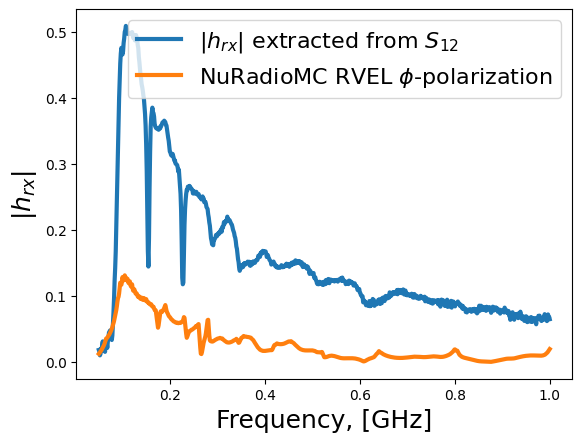

In [5]:
ring_slot = rf.Network('april10_2023/txrx_lpda_co_pol.s2p')
ring_slot.frequency.unit = 'hz'

n_air = 1.0003
c_air = constants.c/n_air #m/c
wavelength = c_air / (ring_slot.f[:])
R=6
S11_magnitude = ring_slot.s_mag[:,1,1]
S12_magnitude = ring_slot.s_mag[:,1,0]

gain = (4*np.pi*R / wavelength)* S12_magnitude

gain_realized = gain*(1- pow(S11_magnitude,2) )

getRelRadiationAngle = np.array([np.pi/8, 0])

tx_angles = np.array([np.pi/2, 0, np.pi/2, -np.pi/2])

antenna_info = antennapattern.AntennaPatternProvider()
lpda = antenna_info.load_antenna_pattern('createLPDA_100MHz_InfAir')

VEL = lpda.get_antenna_response_vectorized(ring_slot.f[:]*1e-9, getRelRadiationAngle[0], getRelRadiationAngle[1], *tx_angles)
RVEL_LPDA = np.sqrt(gain_realized * wavelength**2 * 50  / (4 * np.pi * n_air * (120*np.pi) ) ) 

plt.plot(ring_slot.f[:]*1e-9,RVEL_LPDA, linewidth = 3, label = '$|h_{rx}|$ extracted from $S_{12}$')
                    
plt.plot(ring_slot.f[:]*1e-9,abs(VEL['theta'] ), linewidth = 3, label = 'NuRadioMC RVEL $\phi$-polarization') 
plt.legend(fontsize = 16)
plt.ylabel('$|h_{rx}|$', fontsize=18)
plt.xlabel('Frequency, [GHz]', fontsize=18)

Text(0.5, 0, 'Frequency, [GHz]')

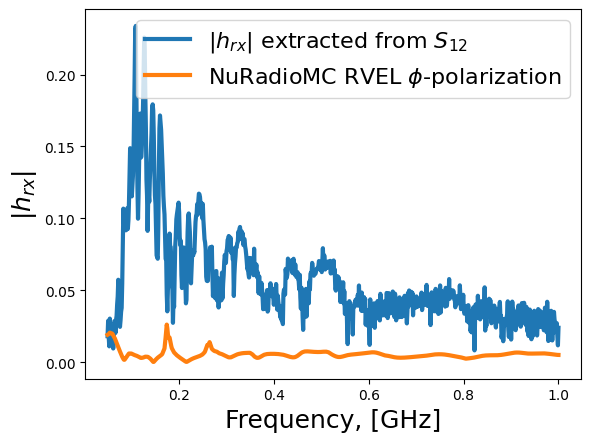

In [6]:
ring_slot = rf.Network('april10_2023/txrx_lpda_cross.s2p')
ring_slot.frequency.unit = 'hz'

n_air = 1.0003
c_air = constants.c/n_air #m/c
wavelength = c_air / (ring_slot.f[:])
R=6
S11_magnitude = ring_slot.s_mag[:,1,1]
S12_magnitude = ring_slot.s_mag[:,1,0]

gain = (4*np.pi*R / wavelength)* S12_magnitude

gain_realized = gain*(1- pow(S11_magnitude,2) )

RVEL_LPDA = np.sqrt(gain_realized * wavelength**2 * 50  / (4 * np.pi * n_air * (120*np.pi) ) ) 

plt.plot(ring_slot.f[:]*1e-9,RVEL_LPDA, linewidth = 3, label = '$|h_{rx}|$ extracted from $S_{12}$')
                    
plt.plot(ring_slot.f[:]*1e-9,abs(VEL['phi'] ), linewidth = 3, label = 'NuRadioMC RVEL $\phi$-polarization') 
plt.legend(fontsize = 16)
plt.ylabel('$|h_{rx}|$', fontsize=18)
plt.xlabel('Frequency, [GHz]', fontsize=18)